In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

In [4]:
data = Daily('10637', start, end)
data = data.fetch()

In [5]:
df = pd.DataFrame(data)
df.to_csv("2022data.csv")
print(data)


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
time                                                                      
2022-01-01   9.7   3.8  12.0   0.0   0.0  192.0   8.6  26.6  1027.1    0.0
2022-01-02   8.1   3.2  12.0   5.1   0.0  221.0  15.8  62.3  1019.3   96.0
2022-01-03   9.8   7.7  12.1  13.6   0.0  230.0  22.3  47.9  1014.3    9.0
2022-01-04   7.4   5.8   9.9  19.3   0.0  209.0  16.2  51.5  1000.4    0.0
2022-01-05   3.9   1.8   6.1   0.0   0.0  241.0  23.4  54.4  1008.4  126.0
...          ...   ...   ...   ...   ...    ...   ...   ...     ...    ...
2022-12-28   6.9   2.3  10.3   0.0   0.0  202.0  18.7  47.9  1018.1    0.0
2022-12-29  10.8   6.3  12.5   4.1   0.0  221.0  29.5  72.4  1010.8   24.0
2022-12-30   8.3   4.0  13.4   1.1   0.0  199.0  17.6  48.2  1013.5  127.0
2022-12-31  15.5  10.9  17.6   0.0   0.0  221.0  29.9  63.0  1014.7  170.0
2023-01-01  12.0   8.1  15.1   0.0   0.0  205.0  11.5  37.1  1019.6   10.0

[366 rows x 10 columns]


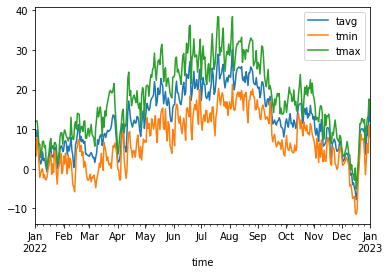

In [6]:
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [7]:
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

In [8]:
X_train = train_data[['tavg', 'tmin', 'tmax']]
y_train = train_data['wspd']
X_test = test_data[['tavg', 'tmin', 'tmax']]
y_test = test_data['wspd']
print(X_test)


            tavg  tmin  tmax
time                        
2022-01-02   8.1   3.2  12.0
2022-01-04   7.4   5.8   9.9
2022-01-08   2.0  -0.3   4.5
2022-01-16   2.1   0.7   3.9
2022-01-23   5.4   4.2   6.6
...          ...   ...   ...
2022-12-05   3.3   1.9   4.4
2022-12-06   3.9   2.8   5.3
2022-12-10  -0.7  -4.4   3.4
2022-12-21   8.9   4.0  11.4
2022-12-23  10.1   7.3  12.7

[73 rows x 3 columns]


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

In [10]:


# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 25.056839963238758


In [11]:
import pickle
pickle.dump(model, open('lr_model.pkl','wb'))